Plotting from: 
['./outputs/plot_data_1531.csv']
Creating ./graphs/plot__1531 ...


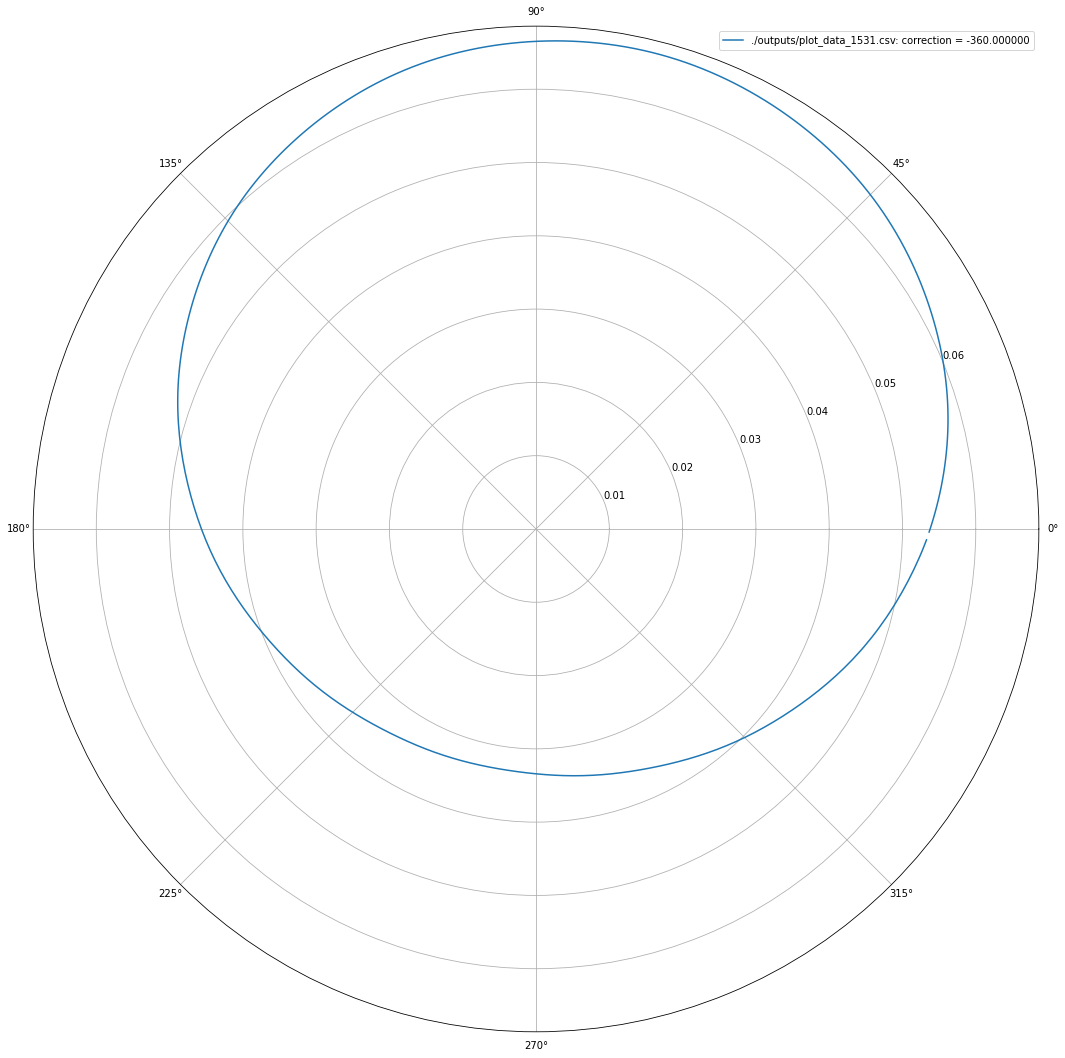

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from date_list_generator import m
from PIL import Image

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

d2r = np.pi/180
r0 = 0.95

with open("./outputs/plot_list.txt") as file:
    lines = [line.rstrip() for line in file]

print("Plotting from: ")
print(lines)

plt.figure(figsize=(10,10))

plotfilename = "./graphs/plot"

# ayanamsa = [0, (11.45/3600)*1500, 0]
# ayanamsa = [0, 0, 0, 0, 0]


for i in range(len(lines)):
    line = lines[i]
    # c = ayanamsa[i]
    plot_data = pd.read_csv(line)

    thetas = plot_data['theta']
    rs = plot_data['r']
    # print(line[-8:-4])
    plt.polar(thetas*d2r-c*d2r, rs-r0, label="%s: correction = %f"%(line, c%360-360))
    plotfilename = plotfilename + '_' + line[-9:-4]

print("Creating %s ..."%plotfilename)

fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
img = fig2img(fig)
img.save('%s.png'%plotfilename)

plt.legend()
plt.show()

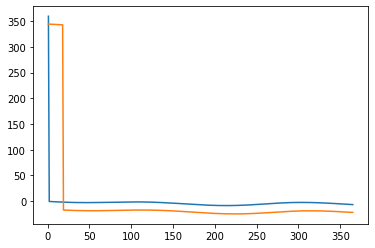

In [205]:
with open("./outputs/plot_list.txt") as file:
    lines = [line.rstrip() for line in file]
for i in range(len(lines)):
    line = lines[i]
    plot_data = pd.read_csv(line)
    thetas = plot_data['theta']
    rs = plot_data['r']
    plt.plot(np.linspace(1, 365, 365), thetas-np.linspace(0, 365, 365), label="true values")
    plotfilename = plotfilename + '_' + line[-9:-4]
# plt.ylim([-10,0])
plt.show()

[0, 8, 16, 24, 32, 33, 41, 49, 57, 65] [ 0.          7.81666667 15.58333333 23.31666667 31.03333333 33.
 40.68333333 48.33333333 55.96666667 63.56666667]


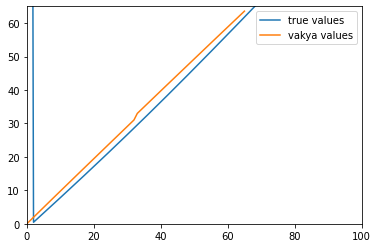

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



thetas = pd.read_csv('./outputs/spa_the_rs_1531.csv')['theta']
plt.plot(np.linspace(1, 365, 365), thetas, label="true values")
dates = [i+8*j for i in [0, 33] for j in range(5)]
thetas = np.add(dates, np.divide([0, -11, -11-14, -11-14-16, -11-14-16-17, 
                                  0, -19, -19-21, -19-21-22, -19-21-22-24],60))
print(dates, thetas)
plt.plot(dates, thetas, label="vakya values")
plt.ylim([0,65])
plt.xlim([0,100])
plt.legend()
plt.show()

In [188]:

print(36000-35999.050340)
print(1-0.010000263801409517)
print(3.8387/3600)

0.9496599999984028
0.9899997361985905
0.0010663055555555556


[-0.00493146  0.00506881  0.01506907  0.02506934  0.0350696   0.04506986]
-0.0049314556445074825
0.010000263801409517
0.010000263802300426
0.01000026380319189
0.010000263804083902
0.010000263804976484


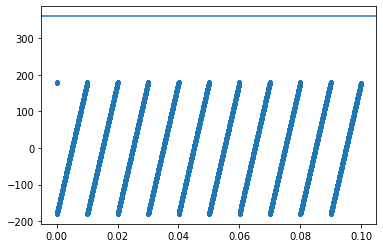

In [179]:
from scipy.optimize import fsolve

X1 = lambda t: (357.52772 + 35999.050340*t - 0.0001603*t**2 - (t**3)/300000)%360-180

print(fsolve(X1, [0, 0.01, 0.02, 0.03, 0.04, 0.05]))
t=0
for s in fsolve(X1, [0, 0.01, 0.02, 0.03, 0.04, 0.05]):
    print(s-t)
    t = s

times = np.linspace(0, 0.1, 100000)

plt.axhline(360)

plt.plot(times, X1(times), '.')
plt.show()

In [28]:
import numpy as np
from astropy import units as u
from astropy.coordinates import Angle

theta_m = Angle('78 degrees')
theta_0 = -Angle('2:6:58 degrees')
rate = Angle('0:59:8.2 degrees')

theta_t = lambda t_0, t_m: t_0 - np.rad2deg(np.arcsin((13.5/360)*np.sin(np.deg2rad(t_0-t_m))))

theta_0 = theta_0+rate*150

print(theta_0)
print(theta_t(theta_0, theta_m))
print(Angle('150 degrees')-theta_t(theta_0, theta_m))

145d43m32s
143d44m12.8216s
6d15m47.1784s


In [71]:
T_SD = Angle('23:56:4.091 hours')
T_SY = Angle('06:09:10 hours')
# T_SY = Angle('6.15277777777777 hours')
T_SY = 365.256363004*24
T_SD = 23.93446972222222
T_CD = Angle('23.999997580335318 hours')
print(1/(1/T_SD - 1/T_SY))
print(T_CD)

23.99999758082764
23h59m59.9913s


In [154]:
print(1/(1/(Angle('17:20:24 degrees'))))

17.34 deg


In [148]:
ayanamsha = lambda year, month, day: 16.90709*(year/1000) - 0.757371*(year/1000)*(year/1000) - 6.92416 + 0.0011574074*(month - 1 + day/30)

print(ayanamsha(2023, 1, 8))
print(Angle('22:27:37 degrees'))

24.179628930714333
22d27m37s


In [166]:
import astropy
from astropy import units as u
print(astropy.time.Time("2023-01-01 00:00:00", scale="utc").jd)

# d = 2280617.5 - 2415020
# print(((50.2564/3600) + (0.000222/3600)*(d/365.25))*3600)

def get_ayanamsha(julian_day):
    d = julian_day - 2280627.5
    # return 22.460277777777776 + (50.2564/3600)*d/365.25 + (0.000222/3600)*(d/365.25)**2
    return 17.327222222222222 + (50.17470977412731/3600)*d/365.25 + (0.000222/3600)*(d/365.25)*(d/365.25)

print(get_ayanamsha(2459945.5)*u.deg-Angle('0:0:0 degrees'))


2459945.5
24d11m04.5776s
